# Capstone Project - The Battle of the Neighborhoods (Week 2)

## ● Introduction (background):
The business to open is a Mexican Restaurant at Los Angeles, CA in the United States of America.
Due to the fact that is well known the food preference of the people and the Latin American
ethnics stablished in the city that would benefit this plan. However, what’s the best neighborhood
to open this kind of business and what are the factors that would impact our decision?

## ● Problem:
In order to help to make this decision it is imperative to stablish the assumptions and parameters
that would lead to the best choice, such as:

1. How many restaurants of the kind are located in the neighborhood?
2. What are the ethnics of the neighborhood?
3. How many high and upper grade schools are located in the neighborhood?

Therefore, the following checklist shall be completed:

    a. Create a dataframe with Los Angeles schools and mexican restaurants
    b. DBSCAN Clustering the dataframe created and dropping all clusters within the restaurants in it.
    c. Create a cloropath map of the city showing the clusters with a density of hispanics ethnics > 70% only.
    b. Add points markers on the map in order to locate the best neighborhoods to place the wanted busines.

## ● Data:

The research made after defining the parameters leaded to some reliable databases from Los
Angeles government. Fist of all, a clustering will be made with the neighborhoods housing the
largest quantity of schools. In addition, to accomplish the objective of the capstone project the
Mexican food restaurants will be merged into the schools list in oirde to have them distributed in the clusters simoustaniely,
with the  aim of droppin all the clusters within a restaurant. Theregore, verifying finally the best candidates according the ethnics by showing the
density of population plotting it on maps using Folium that should match with the conclusion of
the machine learning algorithm after cleaning and creating the final data frame.

To shape our data information the next sources will be consulted:
- Downloadable files containing general information about California's public schools and
districts. https://www.cde.ca.gov/ds/si/ds/pubschls.asp
- City of Los Angeles Neighborhoods Population & Race (2010 Census)
http://www.laalmanac.com/population/po24la.php
- Kaggle dataset for latino restaurant locations in Los Angeles, CA.

## Pre-procesing Data-sets - Executing step 1. 

Downloadable files containing general information about California's public schools and
districts. https://www.cde.ca.gov/ds/si/ds/pubschls.asp

#### Using file at format .xlsx due to values in data set that corrups the format .csv

In [24]:
import numpy as np
import pandas as pd # library for data analsysis

from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Comand to instar reader for xlsx files
!pip install xlrd

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.1.1
Libraries imported


In [25]:
df_data_0 = pd.read_excel("pubschls.xlsx", index_col = None, skiprows = 5)
df_data_0.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,AdmFName1,AdmLName1,AdmEmail1,AdmFName2,AdmLName2,AdmEmail2,AdmFName3,AdmLName3,AdmEmail3,LastUpDate
0,01100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,L Karen,Monroe,lkmonroe@acoe.org,No Data,No Data,No Data,No Data,No Data,No Data,2019-05-31
1,01100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,...,No Data,No Data,Information Not Available,No Data,No Data,Information Not Available,No Data,No Data,Information Not Available,2015-09-01
2,01100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,...,Eve,Gordon,eve@envisionacademy.org,No Data,No Data,No Data,No Data,No Data,No Data,2019-07-01
3,01100170118489,0691051,12283,Closed,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,2125 Jefferson Avenue,2125 Jefferson Ave.,Berkeley,...,No Data,No Data,Information Not Available,No Data,No Data,Information Not Available,No Data,No Data,Information Not Available,2015-07-01
4,01100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,...,Monique,Brinson,moniqueb@communityschoolforcreativeeducation.org,No Data,No Data,No Data,No Data,No Data,No Data,2019-02-13


In [26]:
#Dropping All columns but CDSCode, StatusType, County, City, Latitud and Longitud

df_data_0.drop(['NCESDist', 'NCESSchool', 'District','School', 'Street', 'StreetAbr', 'Zip', 'State', 'MailStreet', 'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Phone', 'Ext', 'WebSite', 'OpenDate', 'ClosedDate', 'Charter', 'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual', 'Magnet', 'YearRoundYN', 'FederalDFCDistrictID', 'AdmFName1', 'AdmLName1', 'AdmEmail1', 'AdmFName2', 'AdmLName2', 'AdmEmail2', 'AdmFName3', 'AdmLName3', 'AdmEmail3', 'LastUpDate'], axis = 1, inplace = True)
df_data_0.head()

,CDSCode,StatusType,County,City,Latitude,Longitude
0,01100170000000,Active,Alameda,Hayward,37.658212,-122.09713
1,01100170109835,Closed,Alameda,Newark,37.521436,-121.99391
2,01100170112607,Active,Alameda,Oakland,37.804520,-122.26815
3,01100170118489,Closed,Alameda,Berkeley,37.868991,-122.27844
4,01100170123968,Active,Alameda,Oakland,37.784648,-122.23863


In [27]:
#Keeping only Schools from Los Angeles and with an Active Status
df_data_0.drop(df_data_0[df_data_0.StatusType != 'Active'].index, inplace=True)
df_data_0.drop(df_data_0[df_data_0.County != 'Los Angeles'].index, inplace=True)
df_data_0.drop(df_data_0[df_data_0.City != 'Los Angeles'].index, inplace=True)
df_data_0.head()

,CDSCode,StatusType,County,City,Latitude,Longitude
3571,19101990106880,Active,Los Angeles,Los Angeles,34.042460,-118.24912
3581,19101990121897,Active,Los Angeles,Los Angeles,34.063497,-118.20587
3605,19101990127522,Active,Los Angeles,Los Angeles,34.128523,-118.18775
3609,19101990134361,Active,Los Angeles,Los Angeles,33.998537,-118.30871
3611,19101990135582,Active,Los Angeles,Los Angeles,33.995341,-118.30851


In [28]:
#Creating a df of schools to merge with restaurants
df_data_0.drop(['StatusType', 'County', 'City'], axis = 1, inplace = True)
df_data_0.rename(columns={"CDSCode": "ID"}, inplace=True)


## Pre-procesing Data-sets - Executing step 2 (Neighborhoods Ethnics).

Downloadable files containing LA's neoghborhood etnichs information. https://data.lacity.org/A-Livable-and-Sustainable-City/Census-Data-by-Neighborhood-Council/nwj3-ufba

#### Using file at format .xlsx due to values in data set that corrups the format .csv


In [29]:
df_data_2 = pd.read_excel("Census_Data_by_Neighborhood_Council.xlsx")
df_data_2.head()

,NC_Name,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Hispanic_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ
0,ARLETA NC,34932.84,2882.67,409.67,67.64,4061.31,34.96,27193.96,37.58,245.05,34700.56,5590.27,2159.94
1,ARROYO SECO NC,21711.47,4640.35,782.76,89.51,3215.37,25.38,12628.00,66.98,263.12,21582.85,4138.14,3235.61
2,ATWATER VILLAGE NC,11385.40,3450.70,127.80,0.15,2379.08,71.85,5102.69,0.37,252.76,11345.53,1877.30,2902.89
3,BEL AIR-BEVERLY CREST NC,26789.14,22024.61,349.63,0.02,1787.79,0.01,1523.88,156.92,946.28,26623.97,8939.21,1943.18
4,BOYLE HEIGHTS NC,81900.56,1562.20,640.97,63.63,2266.59,73.99,77104.38,90.30,98.50,81144.31,4743.28,16001.77


In [30]:
#Dropping all  but  NC_Name, Total Population, and Hispanic_pop

df_data_2.drop(['In_Poverty', 'Owner_occ','Renter_occ','White_pop','Black_pop','Ameri_es_pop','Asian_pop','Hawn_pi_pop','Other_pop','Multi_pop'], axis = 1, inplace = True)

#Converting hisp values in percentage

df_data_2['Hispanic_pop'] = df_data_2['Hispanic_pop']/df_data_2['Total Population']

df_data_2.head()

,NC_Name,Total Population,Hispanic_pop
0,ARLETA NC,34932.84,0.778464
1,ARROYO SECO NC,21711.47,0.581628
2,ATWATER VILLAGE NC,11385.40,0.448178
3,BEL AIR-BEVERLY CREST NC,26789.14,0.056884
4,BOYLE HEIGHTS NC,81900.56,0.941439


In [31]:
df_data_2['NC_Name'] = df_data_2['NC_Name'].str.replace(r' NC','')
df_hisp = df_data_2
df_hisp

,NC_Name,Total Population,Hispanic_pop
0,ARLETA,34932.84,0.778464
1,ARROYO SECO,21711.47,0.581628
2,ATWATER VILLAGE,11385.40,0.448178
3,BEL AIR-BEVERLY CREST,26789.14,0.056884
4,BOYLE HEIGHTS,81900.56,0.941439
...,...,...,...
92,WILMINGTON,59140.55,0.876536
93,WILSHIRE CENTER - KOREATOWN,99702.15,0.537840
94,WINNETKA,51259.94,0.506450
95,WOODLAND HILLS-WARNER CENTER,68837.33,0.143204


In [32]:
df_hisp['NC_Name'] = df_hisp['NC_Name'].str.title() 
df_hisp

,NC_Name,Total Population,Hispanic_pop
0,Arleta,34932.84,0.778464
1,Arroyo Seco,21711.47,0.581628
2,Atwater Village,11385.40,0.448178
3,Bel Air-Beverly Crest,26789.14,0.056884
4,Boyle Heights,81900.56,0.941439
...,...,...,...
92,Wilmington,59140.55,0.876536
93,Wilshire Center - Koreatown,99702.15,0.537840
94,Winnetka,51259.94,0.506450
95,Woodland Hills-Warner Center,68837.33,0.143204



## Pre-procesing Data-sets - Executing step 3 (Mexican/Latinos restaurants location).



In [33]:
df_data_1 = pd.read_excel("Datafiniti_Fast_Food_Restaurants_May19.xlsx")
df_data_1.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [34]:
#Dropping All columns but Categories, City, Latitud and Longitud

df_data_1.drop(['id', 'dateAdded','dateUpdated','address','primaryCategories','country','keys','name','postalCode','province','sourceURLs','websites'], axis = 1, inplace = True)
df_data_1.drop(df_data_1[df_data_1.city != 'Los Angeles'].index, inplace=True)
df_data_1.head()

,categories,city,latitude,longitude
213,"Mexican,Breakfast,Vegetarian,Fast Food,Restaur...",Los Angeles,34.088300,-118.308800
528,"Restaurant,Burger Joint,Mexican,American,Fast ...",Los Angeles,34.063900,-118.287500
1309,"Restaurant,Mexican Restaurants,Taco Place,Fast...",Los Angeles,34.092500,-118.280500
1411,"Fast Food,Chicken,Restaurants",Los Angeles,34.052900,-118.295200
3288,"Restaurant,Fast Food Restaurant,wich Place,Fas...",Los Angeles,34.053538,-118.250897


In [35]:
# Creating a DataFrame to merge with schools.
df_data_1.drop(['city'], axis = 1, inplace = True)
df_rest_loc = df_data_1[df_data_1['categories'].str.contains("Mexican")]
df_rest_loc.rename(columns={"categories": "ID","latitude":"Latitude","longitude":"Longitude"}, inplace=True)
df_rest_loc.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ID,Latitude,Longitude
213,"Mexican,Breakfast,Vegetarian,Fast Food,Restaur...",34.08830,-118.308800
528,"Restaurant,Burger Joint,Mexican,American,Fast ...",34.06390,-118.287500
1309,"Restaurant,Mexican Restaurants,Taco Place,Fast...",34.09250,-118.280500
5379,"Mexican Restaurant,Restaurant,Mexican,Fast Food",34.02748,-118.429292


In [36]:
df_rest_loc.dtypes

ID            object
Latitude     float64
Longitude    float64
dtype: object

## Executing INDEX a) - Merging Schools and Restaurants dataframes.

In [73]:
df_clust = df_data_0.append(df_rest_loc, ignore_index=True)
df_clust = df_clust.reset_index(drop=True)
df_clust

,ID,Latitude,Longitude
0,19101990106880,34.042460,-118.24912
1,19101990121897,34.063497,-118.20587
2,19101990127522,34.128523,-118.18775
3,19101990134361,33.998537,-118.30871
4,19101990135582,33.995341,-118.30851
...,...,...,...
588,19772890109942,34.102359,-118.18336
589,"Mexican,Breakfast,Vegetarian,Fast Food,Restaur...",34.0883,-118.309
590,"Restaurant,Burger Joint,Mexican,American,Fast ...",34.0639,-118.287
591,"Restaurant,Mexican Restaurants,Taco Place,Fast...",34.0925,-118.281


In [74]:
#changing the type of 'Latitude' and 'Longitude'
df_clust[["Latitude", "Longitude"]] = df_clust[["Latitude", "Longitude"]].apply(pd.to_numeric)
df_clust.dtypes

ID            object
Latitude     float64
Longitude    float64
dtype: object

## Visualization of stations on map using basemap package

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


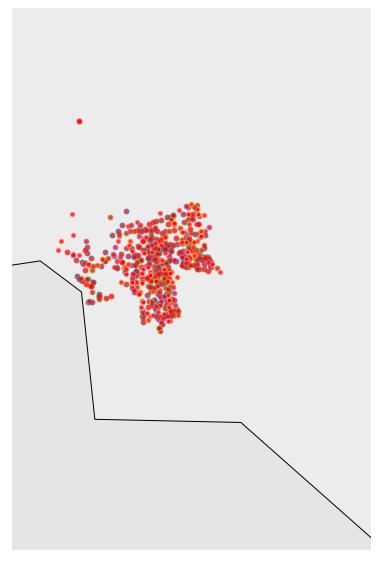

In [75]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-118.6
ulon=-117.8
llat=33.5
ulat=34.5

df_clust = df_clust[(df_clust['Longitude'] > llon) & (df_clust['Longitude'] < ulon) & (df_clust['Latitude'] > llat) &(df_clust['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)

# To collect data based on stations        

xs,ys = my_map(np.asarray(df_clust.Longitude), np.asarray(df_clust.Latitude))
df_clust['xm']= xs.tolist()
df_clust['ym'] =ys.tolist()

#Visualization1
for index,row in df_clust.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()


# DBSCAN Clustering for schools and mexican restaurants locations

In [76]:
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler

In [77]:
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_clust[['Longitude','Latitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_clust["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_clust[["ID","Latitude","Longitude","Clus_Db"]]

,ID,Latitude,Longitude,Clus_Db
0,19101990106880,34.042460,-118.249120,-1
1,19101990121897,34.063497,-118.205870,-1
2,19101990127522,34.128523,-118.187750,-1
3,19101990134361,33.998537,-118.308710,-1
4,19101990135582,33.995341,-118.308510,-1
...,...,...,...,...
588,19772890109942,34.102359,-118.183360,-1
589,"Mexican,Breakfast,Vegetarian,Fast Food,Restaur...",34.088300,-118.308800,-1
590,"Restaurant,Burger Joint,Mexican,American,Fast ...",34.063900,-118.287500,0
591,"Restaurant,Mexican Restaurants,Taco Place,Fast...",34.092500,-118.280500,-1


### Visualization of clusters based on location
Now, we can visualize the clusters using basemap:

In [78]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


Cluster 0
Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7


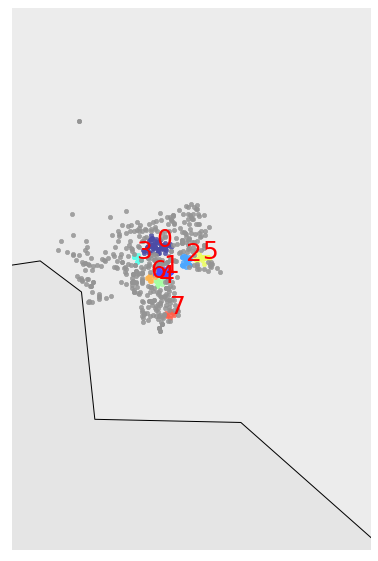

In [80]:
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates()
my_map.fillcontinents(color = 'white', alpha = 0.3)

#### To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_clust[df_clust.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number))

In [81]:
#Dropping all those elements in clusters 0 and -1 because they already have mexican restaurants in the area.
df_clust.drop(df_clust[df_clust.Clus_Db < 1].index, inplace=True)
df_clust

,ID,Latitude,Longitude,xm,ym,Clus_Db
10,19647330100743,34.011574,-118.27364,36289.559172,68419.342196,1
11,19647330100750,34.010434,-118.27393,36257.312658,68266.419595,1
13,19647330100867,34.031652,-118.20961,43409.366972,71112.994611,2
26,19647330102913,33.929468,-118.24623,39337.410676,57410.671338,7
27,19647330106427,34.014575,-118.26081,37716.189409,68821.914054,1
...,...,...,...,...,...,...
563,19647336115794,33.991524,-118.26324,37445.985864,65730.081804,4
568,19647336120471,34.041422,-118.21957,42301.866024,72423.962488,2
583,19753090131383,34.041580,-118.22017,42235.149100,72445.164642,2
585,19770810000000,33.996155,-118.27794,35811.421212,66351.170811,4


In [82]:
# Observing the quantity of schools in each cluster
df_clust_plot = df_clust.pivot_table(index=['Clus_Db'], aggfunc='size')
df_clust_plot

Clus_Db
1    30
2    23
3    11
4    13
5    22
6     9
7    10
dtype: int64

#### Ploting the clusters magnitude in order to visualize the percentage.

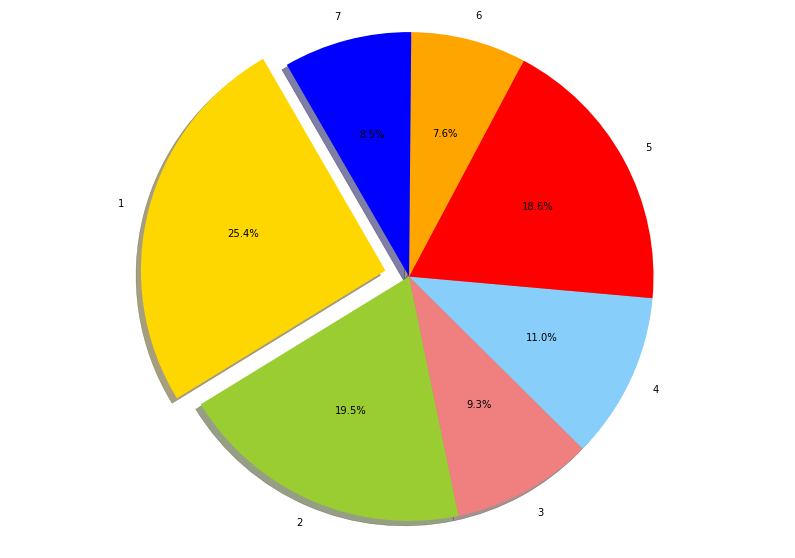

In [83]:
# Data to plot
labels = '1', '2', '3', '4', '5', '6', '7'
sizes = [30, 23, 11, 13, 22, 9, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange', 'blue']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

In [84]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.8           |   py36h45558ae_2         628 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_0        11.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    toolz-0.10.0               |             py_0          46 KB  conda-

In [85]:
# define the LA map
LA_map = folium.Map()

# define the LA map centered around LA with a high zoom level
LA_map = folium.Map(location=[34, -118.2],tiles='Stamen Toner', zoom_start=9.8)

# display LA map
LA_map

## Creating a Choropleht maps to display  the neigborhoods with the highest density of hispanic population.

In [86]:
LA_map.choropleth(
    geo_data=r'LA_Times_Neighborhood_Boundaries.json',
    data = df_data_2,
    columns=['NC_Name', 'Hispanic_pop'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Hispanic population density'
)

# display map
LA_map

## Adding markers in order to identify the neighborhood with the greatest density of hispanic population and schools.

In [87]:
from folium import plugins


# instantiate a mark cluster object for the incidents in the dataframe
sch_mkr = plugins.MarkerCluster().add_to(LA_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(df_clust.Latitude, df_clust.Longitude):
    folium.Marker(
        location=[lat, lng],
        icon=None
    ).add_to(sch_mkr)

# display map
LA_map

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

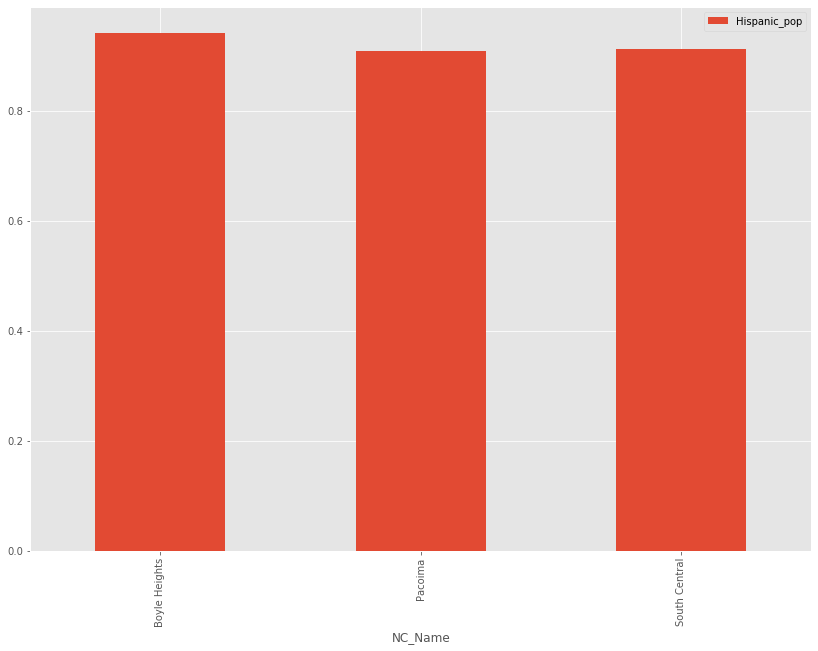

In [88]:
df_hisp.drop(df_hisp[df_hisp.Hispanic_pop < 0.9].index, inplace=True)
df_hisp
df_hisp.plot.bar('NC_Name','Hispanic_pop',rot=0)
plt.xticks(rotation=90)


# Conclusion:

After the analysis by DBSCAN clustering, dropping all those with business of the same kind that the wanted, visualizing the top neighborhoods and finally filling it with the schools' markers from the remaining clusters it is imperatively that the best choice would be the "Boyle Heights" neighborhood. However, it is only taking into account the schools at Los Angeles City (metropolitan area), not the County of Los Angeles in which we have similar high hispanics' density of population. Finally, it could be analyzed as well with other variables as security, crimes, neighborhood income, venues, etc. in order to have a more complete and reliable conclusion.